<a href="https://colab.research.google.com/github/ElenaKirpikova/ST/blob/main/%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from math import log, sqrt
from scipy.stats import shapiro
from scipy.stats import uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [1]:
!apt-get install -qq git

In [ ]:
data_tr = pd.read_csv('Maternal Health Risk Data Set.csv', sep=",")
data_tr.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
data_tr.shape

(1014, 7)

In [ ]:
data_tr.duplicated().sum() # Смотрим статистику, что нет пропусков и отсуствующих значений, дублей

562

In [ ]:
duplicateRows = data_tr[data_tr.duplicated ()]
duplicateRows

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [ ]:
data_tr = data_tr.drop_duplicates()

In [ ]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 705
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          452 non-null    int64  
 1   SystolicBP   452 non-null    int64  
 2   DiastolicBP  452 non-null    int64  
 3   BS           452 non-null    float64
 4   BodyTemp     452 non-null    float64
 5   HeartRate    452 non-null    int64  
 6   RiskLevel    452 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 28.2+ KB


In [ ]:
data_tr.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [ ]:
data_tr.isna().sum()/len(data_tr) #Вычисление процента пропущенных значений в каждом столбце

Age            0.0
SystolicBP     0.0
DiastolicBP    0.0
BS             0.0
BodyTemp       0.0
HeartRate      0.0
RiskLevel      0.0
dtype: float64

In [ ]:
data_tr.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,73.949115
std,13.767379,17.872282,13.754578,2.829209,1.410897,8.156973
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
categorial = data_tr.select_dtypes(include=['object']).columns
print(categorial)

Index(['RiskLevel'], dtype='object')


In [ ]:
numerical = data_tr.select_dtypes(include=['int64', 'float']).columns
print(numerical)

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')


In [ ]:
def df_value_counts(column):
 data_tr[column].value_counts()*100/len(data_tr)
 print (f'Процентное соотношение по категории:{data_tr[column].value_counts()*100/len(data_tr)}')

In [ ]:
df_value_counts('RiskLevel')

Процентное соотношение по категории:RiskLevel
low risk     51.769912
high risk    24.778761
mid risk     23.451327
Name: count, dtype: float64


In [ ]:
def df_value_counts1(column, column2):
  aggg={column2: ['value_counts']}
  data_tr.groupby([column]).agg(aggg)*100/len(data_tr)
  print (f'Процентное соотношение по категориям:')
  print (f' {data_tr.groupby([column]).agg(aggg)*100/len(data_tr)}')

In [ ]:
df_value_counts1('RiskLevel','Age' )

Процентное соотношение по категориям:
                        Age
              value_counts
RiskLevel Age             
high risk 17      3.097345
          35      2.433628
          25      2.433628
          40      2.212389
          50      1.548673
...                    ...
mid risk  27      0.221239
          40      0.221239
          39      0.221239
          36      0.221239
          10      0.221239

[105 rows x 1 columns]


In [ ]:
df_value_counts('RiskLevel')

Процентное соотношение по категории:RiskLevel
low risk     51.769912
high risk    24.778761
mid risk     23.451327
Name: count, dtype: float64


Text(0.5, 1.0, 'Процентное соотношение риска')

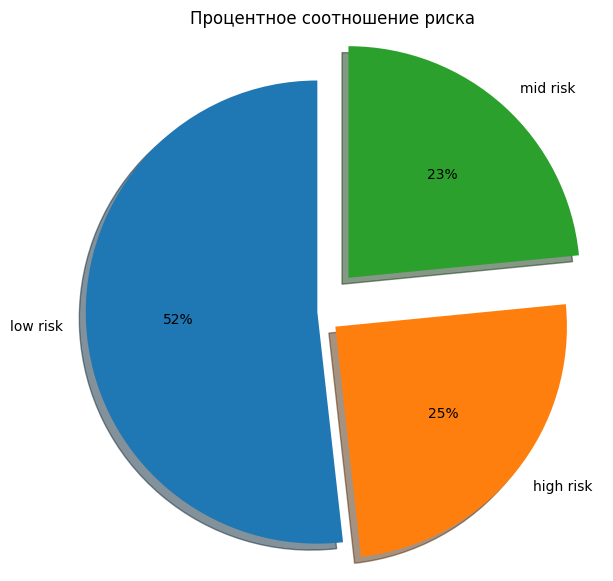

In [ ]:
explode = (0, 0.1, 0.2)
pie1 = data_tr['RiskLevel'].value_counts()*100/len(data_tr)
plt.figure(figsize=(7,7))
plt.pie(pie1,labels=pie1.index, autopct='%1.0f%%', startangle=90, shadow=True, explode=explode)
plt.axis('equal')
plt.title('Процентное соотношение риска')

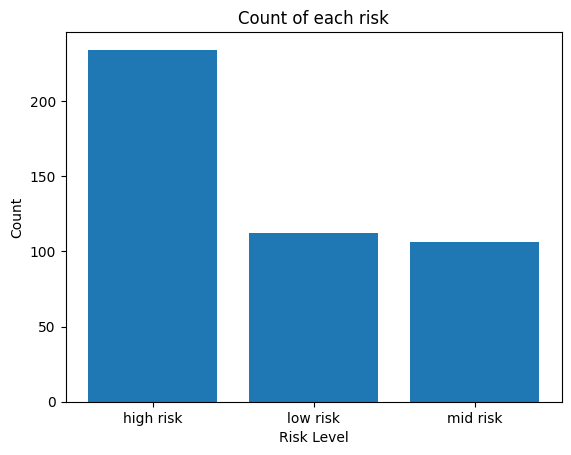

In [ ]:
plt.bar(data_tr['RiskLevel'].unique(), data_tr['RiskLevel'].value_counts())
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.title('Count of each risk')
plt.show()

In [ ]:
print('Count of unique values')
for i in data_tr.columns:
    print(f'{i} : {len(data_tr[i].unique())}')

Count of unique values
Age : 50
SystolicBP : 19
DiastolicBP : 16
BS : 29
BodyTemp : 8
HeartRate : 16
RiskLevel : 3


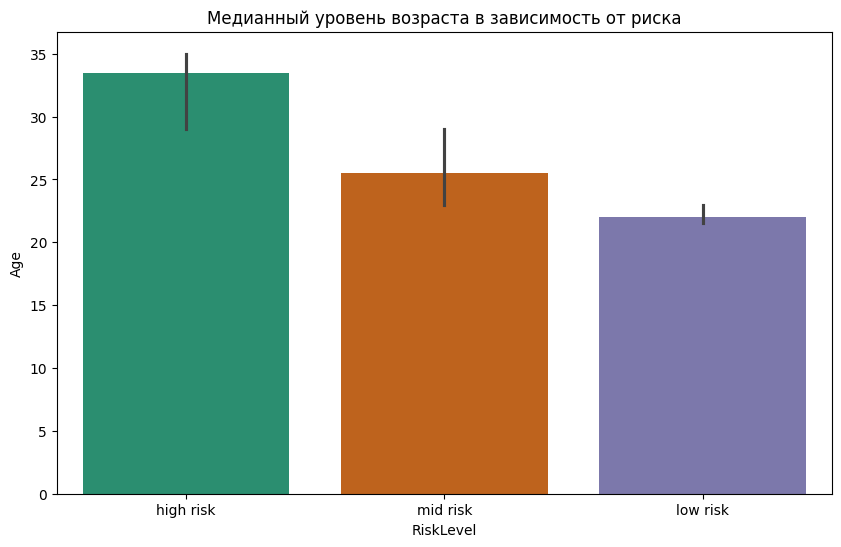

In [ ]:
plt.figure(figsize=[10, 6])
result = data_tr.groupby(["RiskLevel"])['Age'].aggregate(np.median).reset_index().sort_values('Age', ascending=False)
diag = sns.barplot(data=data_tr, x="RiskLevel", y="Age", estimator=np.median, palette='Dark2', order=result['RiskLevel'])
diag.set_xlabel=('RiskLevel')
diag.set_ylabel('Age')
plt.title('Медианный уровень возраста в зависимость от риска')
plt.show()


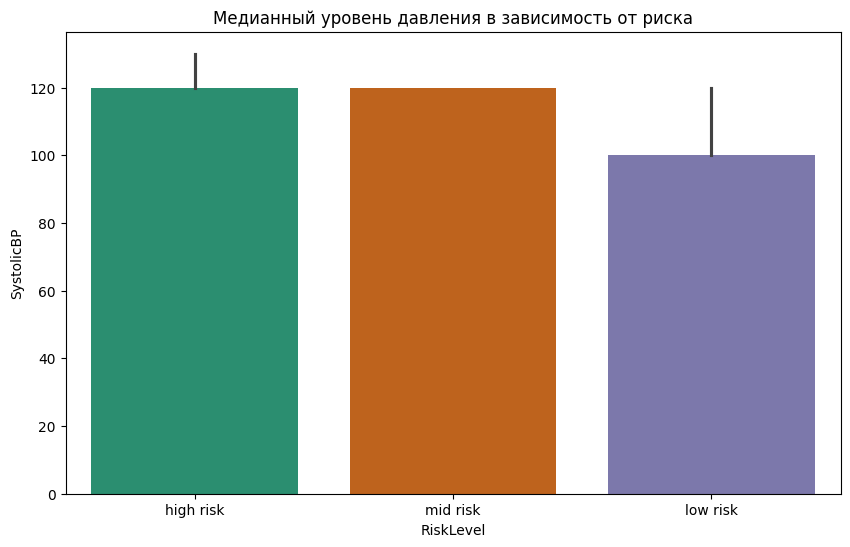

In [ ]:
plt.figure(figsize=[10, 6])
result = data_tr.groupby(["RiskLevel"])['SystolicBP'].aggregate(np.median).reset_index().sort_values('SystolicBP', ascending=False)
diag = sns.barplot(data=data_tr, x="RiskLevel", y="SystolicBP", estimator=np.median, palette='Dark2', order=result['RiskLevel'])
diag.set_xlabel=('RiskLevel')
diag.set_ylabel('SystolicBP')
plt.title('Медианный уровень уровень систалического давления в зависимость от риска')
plt.show()

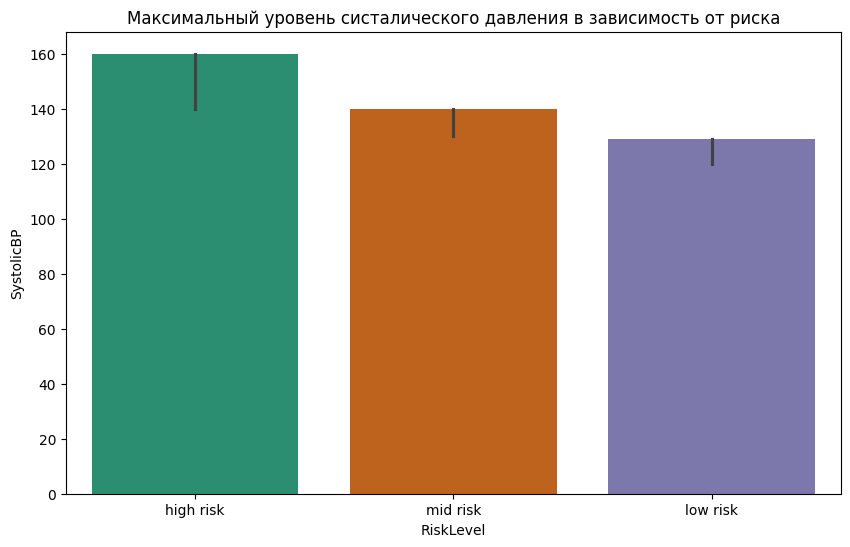

In [ ]:
plt.figure(figsize=[10, 6])
result = data_tr.groupby(["RiskLevel"])['SystolicBP'].aggregate(np.max).reset_index().sort_values('SystolicBP', ascending=False)
diag = sns.barplot(data=data_tr, x="RiskLevel", y="SystolicBP", estimator=np.max, palette='Dark2', order=result['RiskLevel'])
diag.set_xlabel=('RiskLevel')
diag.set_ylabel('SystolicBP')
plt.title('Максимальный уровень систалического давления в зависимость от риска')
plt.show()

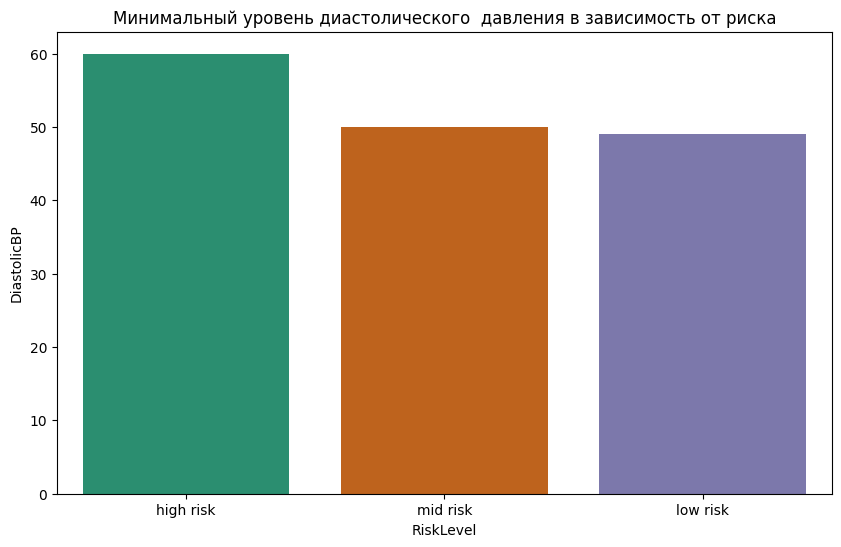

In [ ]:
plt.figure(figsize=[10, 6])
result = data_tr.groupby(["RiskLevel"])['DiastolicBP'].aggregate(np.min).reset_index().sort_values('DiastolicBP', ascending=False)
diag = sns.barplot(data=data_tr, x="RiskLevel", y="DiastolicBP", estimator=np.min, palette='Dark2', order=result['RiskLevel'])
diag.set_xlabel=('RiskLevel')
diag.set_ylabel('DiastolicBP')
plt.title('Минимальный уровень диастолического  давления в зависимость от риска')
plt.show()

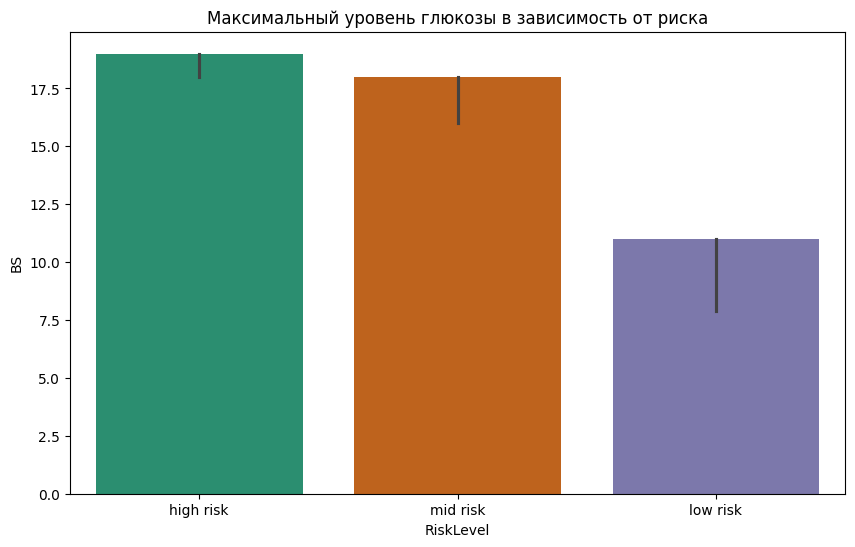

In [ ]:
plt.figure(figsize=[10, 6])
result = data_tr.groupby(["RiskLevel"])['BS'].aggregate(np.max).reset_index().sort_values('BS', ascending=False)
diag = sns.barplot(data=data_tr, x="RiskLevel", y="BS", estimator=np.max, palette='Dark2', order=result['RiskLevel'])
diag.set_xlabel=('RiskLevel')
diag.set_ylabel('BS')
plt.title('Максимальный уровень глюкозы в зависимость от риска')
plt.show()

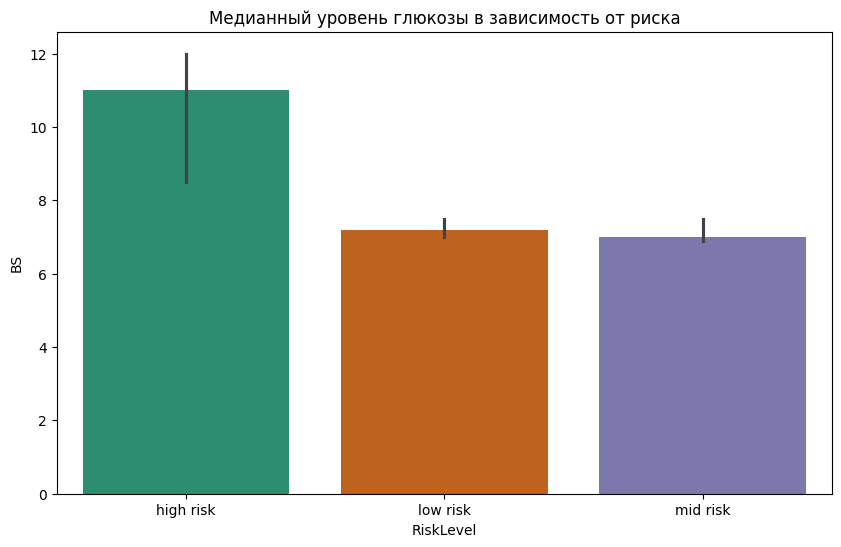

In [ ]:
plt.figure(figsize=[10, 6])
result = data_tr.groupby(["RiskLevel"])['BS'].aggregate(np.median).reset_index().sort_values('BS', ascending=False)
diag = sns.barplot(data=data_tr, x="RiskLevel", y="BS", estimator=np.median, palette='Dark2', order=result['RiskLevel'])
diag.set_xlabel=('RiskLevel')
diag.set_ylabel('BS')
plt.title('Медианный уровень глюкозы в зависимость от риска')
plt.show()

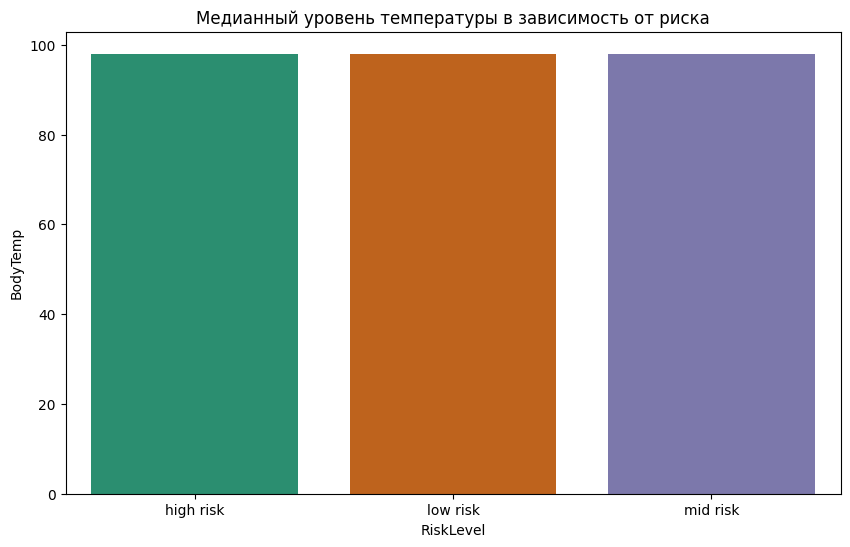

In [ ]:
plt.figure(figsize=[10, 6])
result = data_tr.groupby(["RiskLevel"])['BodyTemp'].aggregate(np.median).reset_index().sort_values('BodyTemp', ascending=False)
diag = sns.barplot(data=data_tr, x="RiskLevel", y="BodyTemp", estimator=np.median, palette='Dark2', order=result['RiskLevel'])
diag.set_xlabel=('RiskLevel')
diag.set_ylabel('BodyTemp')
plt.title('Медианный уровень температуры в зависимость от риска')
plt.show()

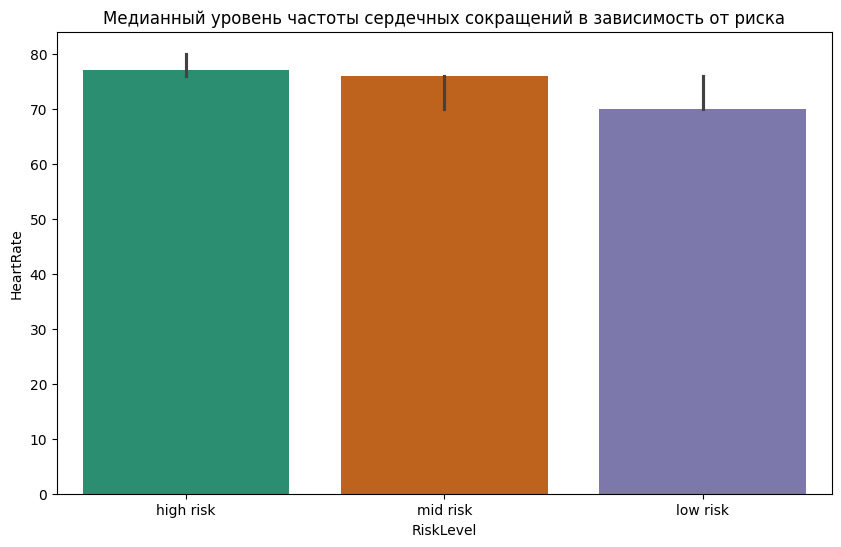

In [ ]:
plt.figure(figsize=[10, 6])
result = data_tr.groupby(["RiskLevel"])['HeartRate'].aggregate(np.median).reset_index().sort_values('HeartRate', ascending=False)
diag = sns.barplot(data=data_tr, x="RiskLevel", y="HeartRate", estimator=np.median, palette='Dark2', order=result['RiskLevel'])
diag.set_xlabel=('RiskLevel')
diag.set_ylabel('HeartRate')
plt.title('Медианный уровень частоты сердечных сокращений в зависимость от риска')
plt.show()

Графики на наличие выбросов

In [ ]:
 sns.set(rc={"figure.figsize":(10 , 7)})

In [ ]:
def df_1(column):
 sns.boxplot(data = data_tr, x=column, orient='v')
 sns.stripplot(data_tr[column], orient='h', color="red")

In [ ]:
def df(column):
  sns.histplot(data_tr[column], kde=True)
  shapiro(data_tr[column])
  print (f'Тест нормального распределения по критерию Шапиро:{shapiro(data_tr[column])}')

In [ ]:
print(numerical)

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')


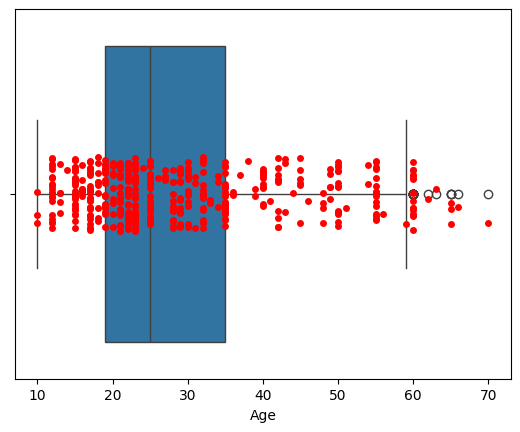

In [ ]:
df_1('Age')

Тест нормального распределения по критерию Шапиро:ShapiroResult(statistic=0.9022222782010315, pvalue=1.951383171945737e-16)


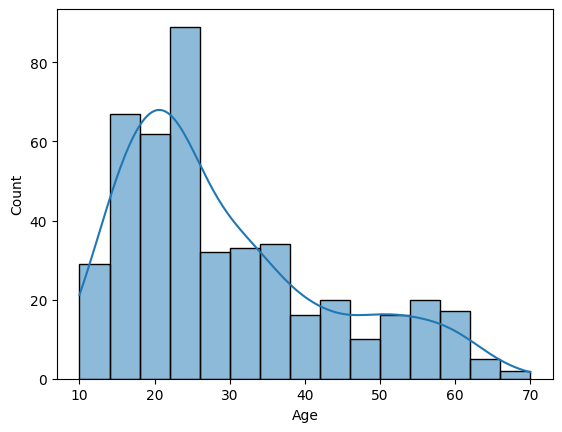

In [ ]:
df('Age')

Тест нормального распределения по критерию Шапиро:ShapiroResult(statistic=0.9073992548264046, pvalue=5.671867424547548e-16)


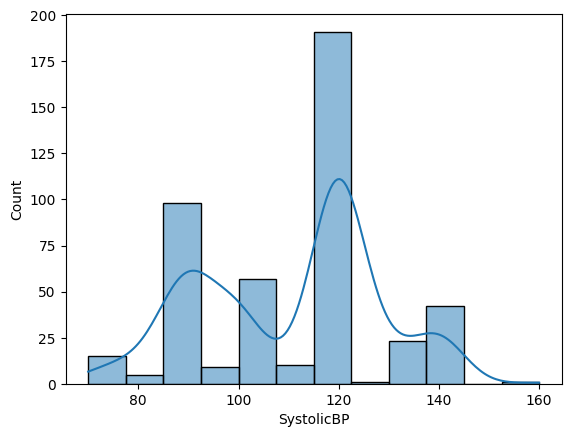

In [ ]:
df('SystolicBP')


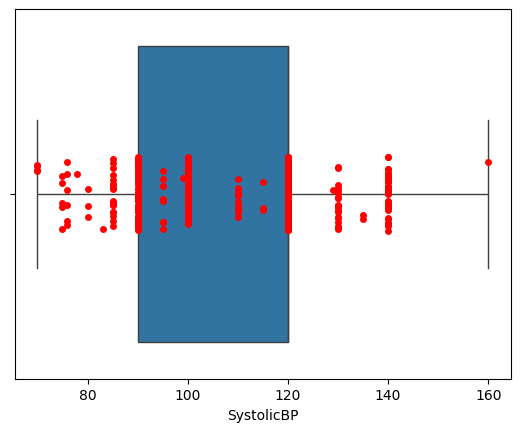

In [ ]:
 df_1('SystolicBP')

Тест нормального распределения по критерию Шапиро:ShapiroResult(statistic=0.9500394587367772, pvalue=3.184402735751232e-11)


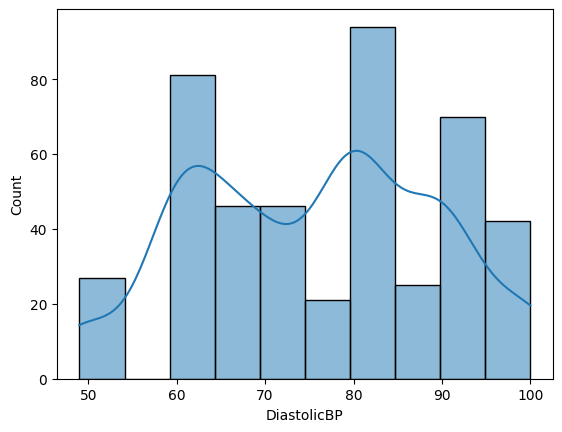

In [ ]:
df('DiastolicBP')

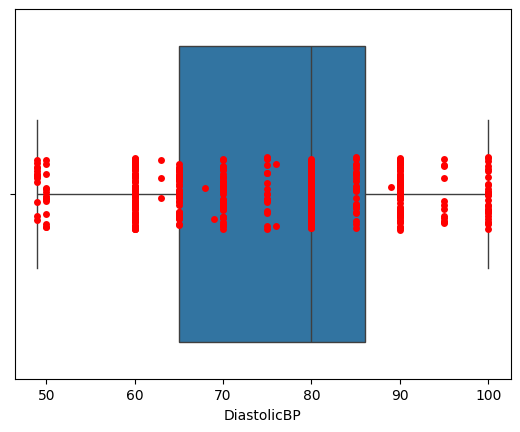

In [ ]:
df_1('DiastolicBP')

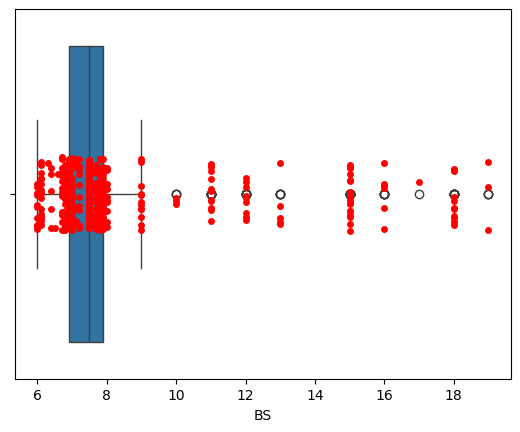

In [ ]:
df_1('BS')

Тест нормального распределения по критерию Шапиро:ShapiroResult(statistic=0.6294458521244959, pvalue=4.6830230943164766e-30)


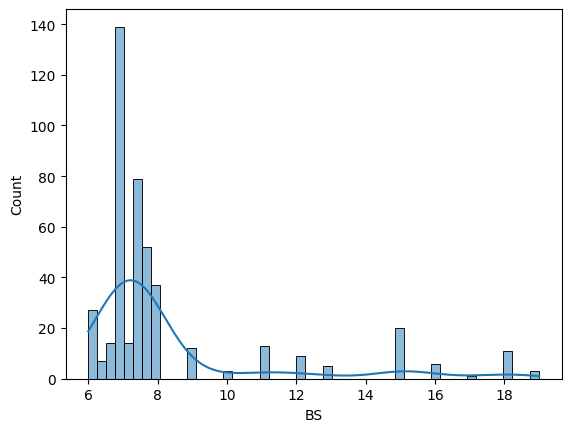

In [ ]:
df('BS')

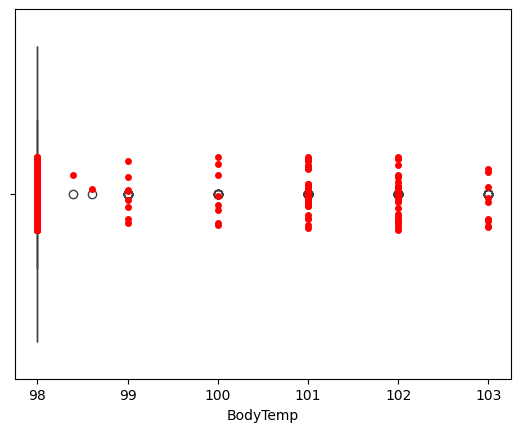

In [ ]:
df_1('BodyTemp')

Тест нормального распределения по критерию Шапиро:ShapiroResult(statistic=0.5366166001447306, pvalue=9.047729273396071e-33)


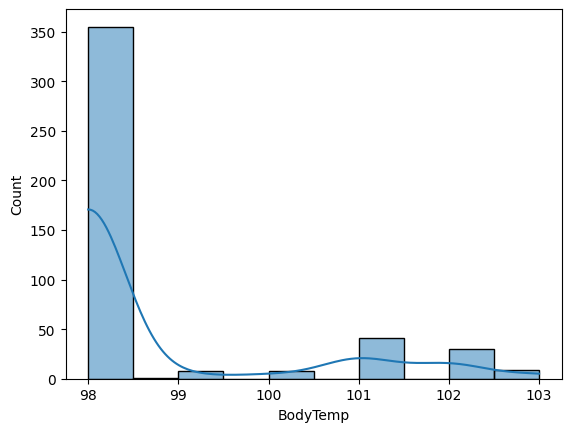

In [ ]:
df('BodyTemp')

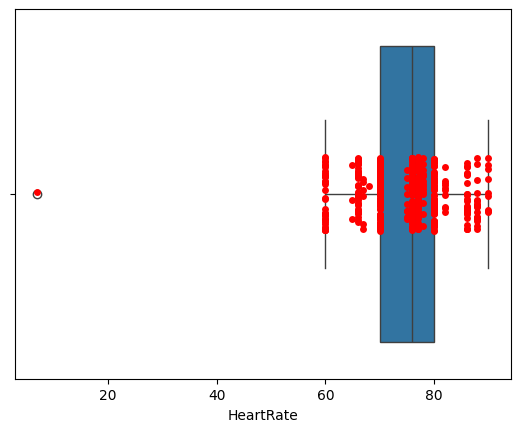

In [ ]:
df_1('HeartRate')

Тест нормального распределения по критерию Шапиро:ShapiroResult(statistic=0.9040855796443736, pvalue=2.851441982142316e-16)


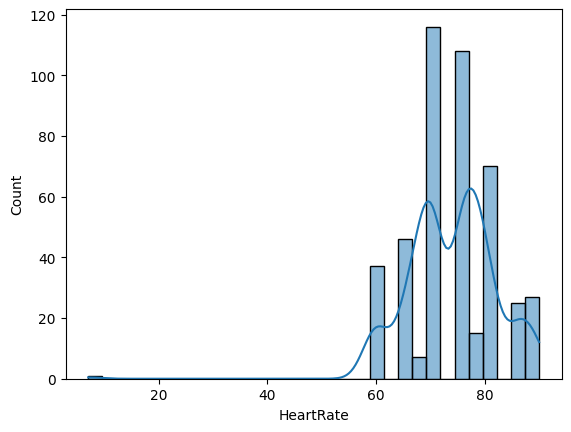

In [ ]:
df('HeartRate')

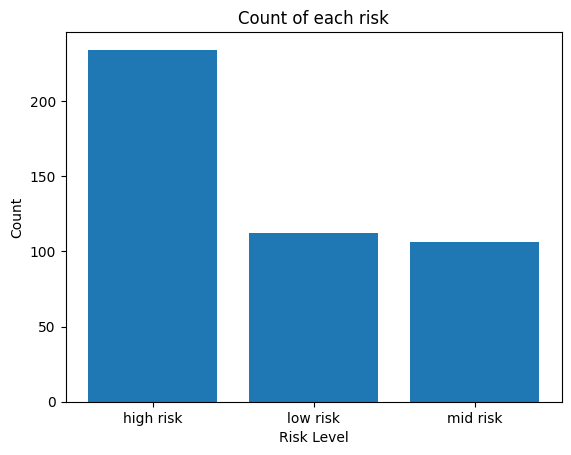

In [ ]:
plt.bar(data_tr['RiskLevel'].unique() , data_tr['RiskLevel'].value_counts())
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.title('Count of each risk')
plt.show()

Построим матрицу корреляций для числовых признаков

In [ ]:
matrix_Num=data_tr.corr(numeric_only=True)
matrix_Num

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.375931,0.347846,0.376616,-0.188843,0.077407
SystolicBP,0.375931,1.000000,0.790002,0.347534,-0.207267,-0.006088
DiastolicBP,0.347846,0.790002,1.000000,0.300423,-0.201992,-0.016470
BS,0.376616,0.347534,0.300423,1.000000,-0.042511,0.135605
BodyTemp,-0.188843,-0.207267,-0.201992,-0.042511,1.000000,0.087262
HeartRate,0.077407,-0.006088,-0.016470,0.135605,0.087262,1.000000


<Axes: >

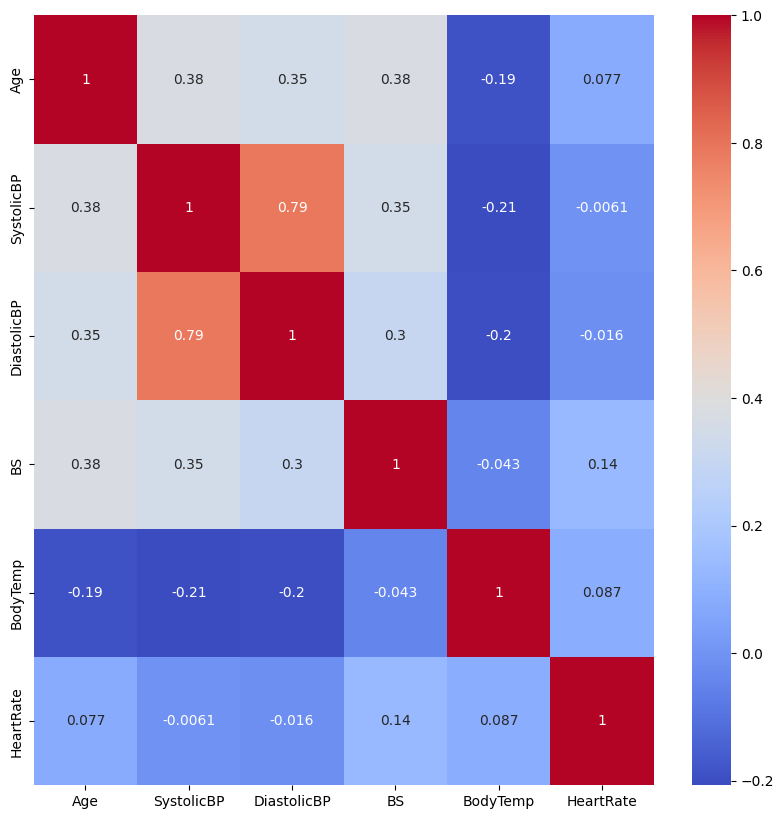

In [ ]:
plt.figure(figsize=[10,10])
sns.heatmap(matrix_Num, cmap='coolwarm', annot=True)

Корреляция между признаками  0,4 - 0.79. Максимальная 0,79 между SystolicBP и DiastolicBP.

Преобразование данных

Добавим новые признаки: группа по возрастам, давлению


Группа по возрасту:
1. 10-18
2. 19-30
3. 30-40
4. 40-50
5. более 50 лет






Группа диастолическое давление:

1.   пониженное < 60
2.   норма 60-85
3.   высокое нормальное 85-89
4.   гипертония 1 ст 90-99
5.   гипертония 2 ст 100-109
6.   гипертония 3 ст более 110


Группа систалическое давление:

1.   пониженное < 100
2.   норма 100-129
3.   высокое нормальное 130-139
4.   гипертония 1 ст 140-159
5.   гипертония 2 ст 160-179
6.   гипертония 3 ст более 180



In [ ]:
data_copy = data_tr.copy()
data_copy.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,73.949115
std,13.767379,17.872282,13.754578,2.829209,1.410897,8.156973
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 705
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          452 non-null    int64  
 1   SystolicBP   452 non-null    int64  
 2   DiastolicBP  452 non-null    int64  
 3   BS           452 non-null    float64
 4   BodyTemp     452 non-null    float64
 5   HeartRate    452 non-null    int64  
 6   RiskLevel    452 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 28.2+ KB


In [ ]:
def Age_group(data_copy):
    Age_group = 0
    if data_copy["Age"]<= 18:
        Age_group = '10-18'
    if data_copy["Age"]>=31 and data_copy["Age"]<= 40:
       Age_group ='31-40'
    if data_copy["Age"]>=19 and data_copy["Age"]<= 30:
        Age_group ='19-30'
    if data_copy["Age"]>=41 and data_copy["Age"]<= 50:
       Age_group ='41-50'
    if data_copy["Age"]>50:
       Age_group ='50-70'
    return (Age_group)

In [ ]:
data_copy["Age_group"] = data_copy.apply(Age_group, axis=1)

In [ ]:
data_copy.value_counts('Age_group')

Age_group
19-30    186
10-18    106
31-40     69
41-50     46
50-70     45
Name: count, dtype: int64

Text(0.5, 1.0, 'Процентное соотношение групп по возрастам')

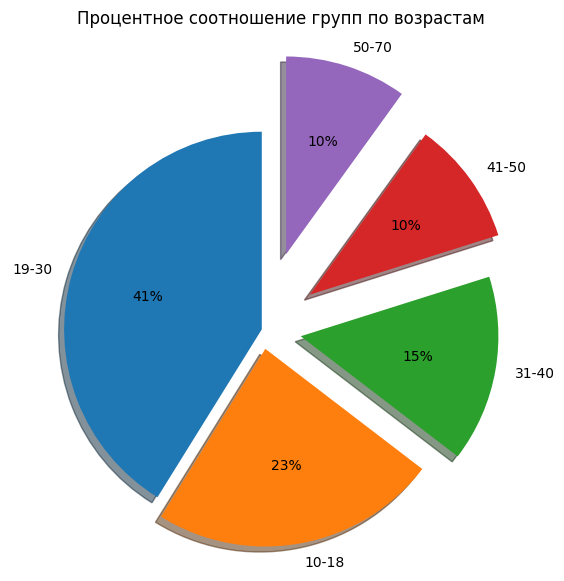

In [ ]:
explode = (0, 0.1, 0.2, 0.3, 0.4)
pie1 = data_copy['Age_group'].value_counts()*100/len(data_tr)
plt.figure(figsize=(7,7))
plt.pie(pie1,labels=pie1.index,  autopct='%1.0f%%', startangle=90, shadow=True, explode=explode)
plt.axis('equal')
plt.title('Процентное соотношение групп по возрастам')

In [ ]:
def df(column,y):
  plt.figure(figsize=[15, 8])
  diag=sns.countplot(data=data_copy, x=data_copy[column], hue=data_copy['RiskLevel'], palette='Set1')
  diag.set_xlabel=(column)
  diag.set_ylabel('Count')
  title = column
  plt.legend(['high risk', 'low risk','mid risk' ], loc = 'upper right')
  plt.title(column)
  plt.show()

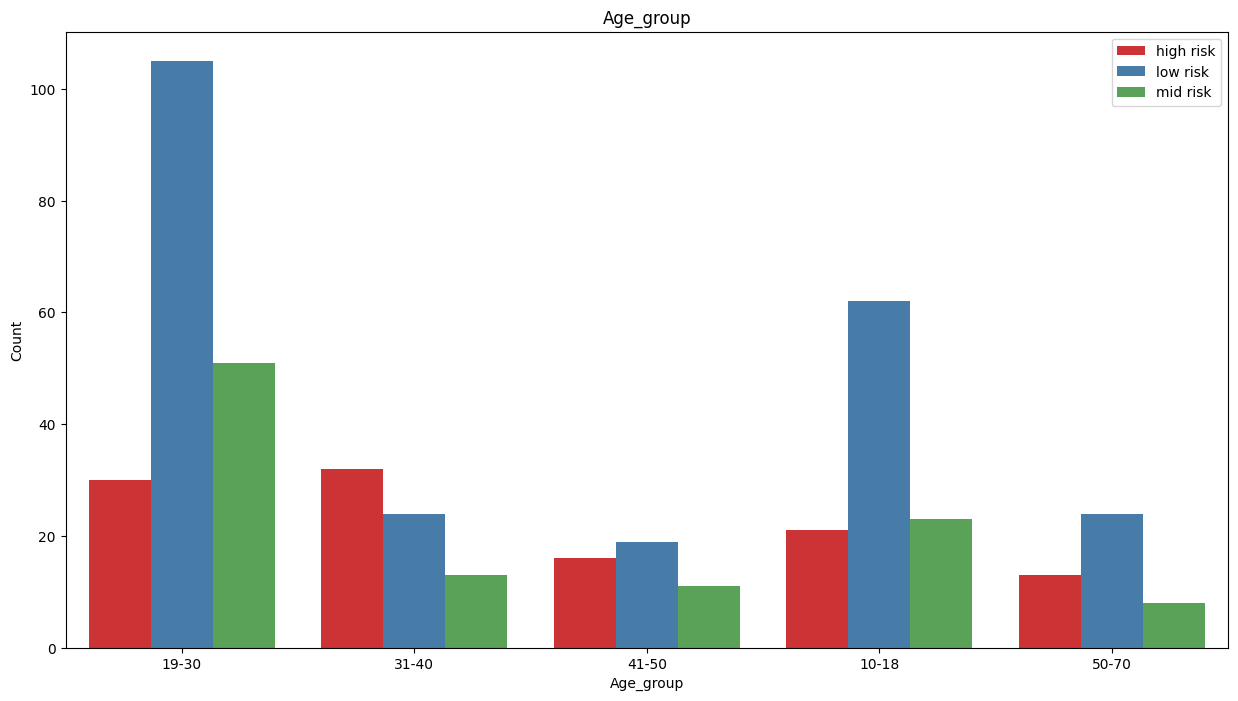

In [ ]:
df('Age_group', 'RiskLevel')

In [ ]:
def df_value_counts1(column, column2):
  aggg={column2: ['value_counts']}
  data_copy.groupby([column]).agg(aggg)*100/len(data_tr)
  print (f'Процентное соотношение по категориям:')
  print (f' {data_copy.groupby([column]).agg(aggg)*100/len(data_copy)}')

In [ ]:
df_value_counts1('Age_group', 'RiskLevel')

Процентное соотношение по категориям:
                        RiskLevel
                    value_counts
Age_group RiskLevel             
10-18     low risk     13.716814
          mid risk      5.088496
          high risk     4.646018
19-30     low risk     23.230088
          mid risk     11.283186
          high risk     6.637168
31-40     high risk     7.079646
          low risk      5.309735
          mid risk      2.876106
41-50     low risk      4.203540
          high risk     3.539823
          mid risk      2.433628
50-70     low risk      5.309735
          high risk     2.876106
          mid risk      1.769912


In [ ]:
data_copy.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_group
0,25,130,80,15.00,98.0,86,high risk,19-30
1,35,140,90,13.00,98.0,70,high risk,31-40
2,29,90,70,8.00,100.0,80,high risk,19-30
3,30,140,85,7.00,98.0,70,high risk,19-30
4,35,120,60,6.10,98.0,76,low risk,31-40
5,23,140,80,7.01,98.0,70,high risk,19-30
6,23,130,70,7.01,98.0,78,mid risk,19-30
7,35,85,60,11.00,102.0,86,high risk,31-40
8,32,120,90,6.90,98.0,70,mid risk,31-40
9,42,130,80,18.00,98.0,70,high risk,41-50


In [ ]:
def BP_group(data_copy):
    BP_group = 0
    if data_copy["DiastolicBP"]<= 60:
        BP_group = 'Low_Dbp'
    if data_copy["DiastolicBP"]>=61 and data_copy["DiastolicBP"]<= 84:
       BP_group ='Norm_Dbp'
    if data_copy["DiastolicBP"]>=85 and data_copy["DiastolicBP"]<= 89:
        BP_group ='HighNorm_Dbp'
    if data_copy["DiastolicBP"]>=90 and data_copy["DiastolicBP"]<= 99:
        BP_group ='1st_Dbp'
    if data_copy["DiastolicBP"]>=100 and data_copy["DiastolicBP"]<= 109:
       BP_group ='2st_Dbp'
    if data_copy["DiastolicBP"]>110:
       BP_group ='3st_Dbp'
    return (BP_group)

In [ ]:
data_copy["BP_group"] = data_copy.apply(BP_group, axis=1)

In [ ]:
data_copy.value_counts('BP_group')

BP_group
Norm_Dbp        210
Low_Dbp         105
1st_Dbp          82
2st_Dbp          30
HighNorm_Dbp     25
Name: count, dtype: int64

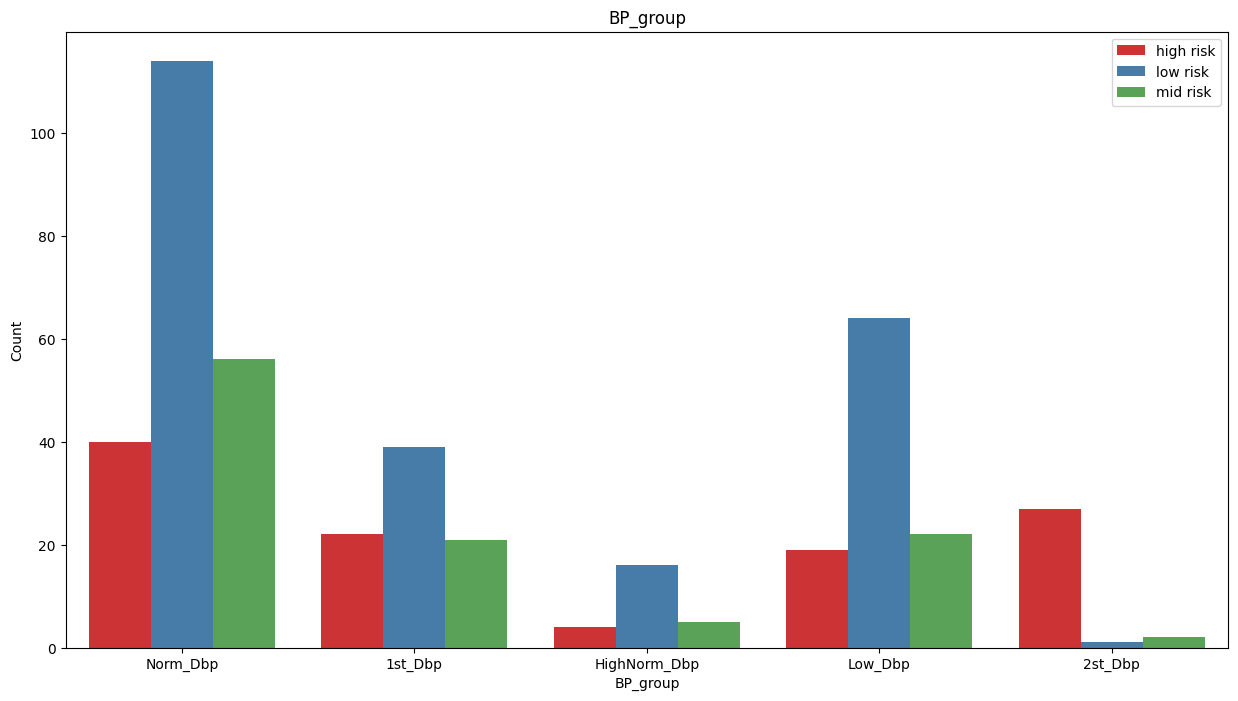

In [ ]:
df('BP_group', 'RiskLevel')

In [ ]:
def BP_Sgroup(data_copy):
    BP_Sgroup = 0
    if data_copy["SystolicBP"]<= 100:
       BP_Sgroup = 'Low_Sbp'
    if data_copy["SystolicBP"]>=101 and data_copy["SystolicBP"]<= 129:
       BP_Sgroup ='Norm_Sbp'
    if data_copy["SystolicBP"]>=130 and data_copy["SystolicBP"]<= 139:
        BP_Sgroup ='HighNorm_Sbp'
    if data_copy["SystolicBP"]>=140 and data_copy["SystolicBP"]<= 159:
        BP_Sgroup ='1st_Sbp'
    if data_copy["SystolicBP"]>=160 and data_copy["SystolicBP"]<= 179:
       BP_Sgroup ='2st_Sbp'
    if data_copy["SystolicBP"]>180:
       BP_Sgroup ='3st_Sbp'
    return (BP_Sgroup)

In [ ]:
   data_copy["BP_Sgroup"] = data_copy.apply(BP_Sgroup, axis=1)

In [ ]:
data_copy.value_counts('BP_Sgroup')

BP_Sgroup
Norm_Sbp        202
Low_Sbp         184
1st_Sbp          42
HighNorm_Sbp     23
2st_Sbp           1
Name: count, dtype: int64

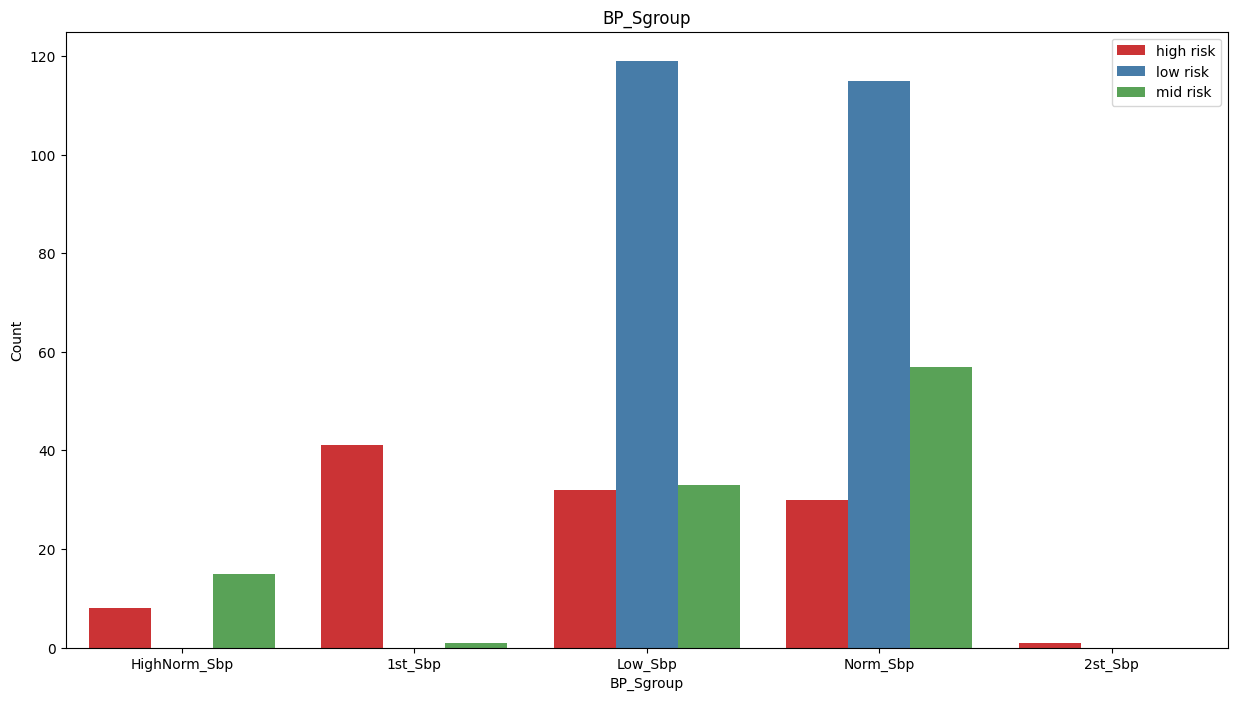

In [ ]:
df('BP_Sgroup', 'RiskLevel')

In [ ]:
df_value_counts1('BP_Sgroup', 'RiskLevel')

Процентное соотношение по категориям:
                           RiskLevel
                       value_counts
BP_Sgroup    RiskLevel             
1st_Sbp      high risk     9.070796
             mid risk      0.221239
2st_Sbp      high risk     0.221239
HighNorm_Sbp mid risk      3.318584
             high risk     1.769912
Low_Sbp      low risk     26.327434
             mid risk      7.300885
             high risk     7.079646
Norm_Sbp     low risk     25.442478
             mid risk     12.610619
             high risk     6.637168


In [ ]:
data = data_copy.copy()

In [ ]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_group,BP_group,BP_Sgroup
0,25,130,80,15.0,98.0,86,high risk,19-30,Norm_Dbp,HighNorm_Sbp
1,35,140,90,13.0,98.0,70,high risk,31-40,1st_Dbp,1st_Sbp
2,29,90,70,8.0,100.0,80,high risk,19-30,Norm_Dbp,Low_Sbp
3,30,140,85,7.0,98.0,70,high risk,19-30,HighNorm_Dbp,1st_Sbp
4,35,120,60,6.1,98.0,76,low risk,31-40,Low_Dbp,Norm_Sbp


*  Закодируем данные в столбцах 'RiskLevel 1-3

In [ ]:
risklevel = {"low risk" : 1,
            "mid risk" : 2,
            "high risk" : 3}

# Apply Using Map
data["RiskLevel"] = data["RiskLevel"].map(risklevel).astype(int)
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_group,BP_group,BP_Sgroup
0,25,130,80,15.0,98.0,86,3,19-30,Norm_Dbp,HighNorm_Sbp
1,35,140,90,13.0,98.0,70,3,31-40,1st_Dbp,1st_Sbp
2,29,90,70,8.0,100.0,80,3,19-30,Norm_Dbp,Low_Sbp
3,30,140,85,7.0,98.0,70,3,19-30,HighNorm_Dbp,1st_Sbp
4,35,120,60,6.1,98.0,76,1,31-40,Low_Dbp,Norm_Sbp
...,...,...,...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,2,10-18,Low_Dbp,Low_Sbp
674,15,100,60,6.0,98.0,80,1,10-18,Low_Dbp,Low_Sbp
703,15,100,49,7.6,98.0,77,1,10-18,Low_Dbp,Low_Sbp
704,12,100,50,6.0,98.0,70,2,10-18,Low_Dbp,Low_Sbp


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns
data= pd.get_dummies(data, columns=categorical_columns, drop_first=True, dtype=int)

In [ ]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_group_19-30,Age_group_31-40,Age_group_41-50,Age_group_50-70,BP_group_2st_Dbp,BP_group_HighNorm_Dbp,BP_group_Low_Dbp,BP_group_Norm_Dbp,BP_Sgroup_2st_Sbp,BP_Sgroup_HighNorm_Sbp,BP_Sgroup_Low_Sbp,BP_Sgroup_Norm_Sbp
0,25,130,80,15.0,98.0,86,3,1,0,0,0,0,0,0,1,0,1,0,0
1,35,140,90,13.0,98.0,70,3,0,1,0,0,0,0,0,0,0,0,0,0
2,29,90,70,8.0,100.0,80,3,1,0,0,0,0,0,0,1,0,0,1,0
3,30,140,85,7.0,98.0,70,3,1,0,0,0,0,1,0,0,0,0,0,0
4,35,120,60,6.1,98.0,76,1,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,2,0,0,0,0,0,0,1,0,0,0,1,0
674,15,100,60,6.0,98.0,80,1,0,0,0,0,0,0,1,0,0,0,1,0
703,15,100,49,7.6,98.0,77,1,0,0,0,0,0,0,1,0,0,0,1,0
704,12,100,50,6.0,98.0,70,2,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 705
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    int64  
 1   SystolicBP              452 non-null    int64  
 2   DiastolicBP             452 non-null    int64  
 3   BS                      452 non-null    float64
 4   BodyTemp                452 non-null    float64
 5   HeartRate               452 non-null    int64  
 6   RiskLevel               452 non-null    int64  
 7   Age_group_19-30         452 non-null    int64  
 8   Age_group_31-40         452 non-null    int64  
 9   Age_group_41-50         452 non-null    int64  
 10  Age_group_50-70         452 non-null    int64  
 11  BP_group_2st_Dbp        452 non-null    int64  
 12  BP_group_HighNorm_Dbp   452 non-null    int64  
 13  BP_group_Low_Dbp        452 non-null    int64  
 14  BP_group_Norm_Dbp       452 non-null    int64  

In [ ]:
X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Обучение модели логистической регрессии с параметрами по умолчанию (LogisticRegression)

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lg_model.predict(X_test)
y_pred

array([3, 1, 2, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 2, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2,
       1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [ ]:
y= pd.DataFrame({"pred":y_pred})

In [ ]:
y['pred'].value_counts()

pred
1.0    72
3.0    15
2.0     4
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

RiskLevel
1    47
2    26
3    18
Name: count, dtype: int64

In [ ]:
accuracy_lg = accuracy_score(y_test, y_pred)
print(f'Библиотечная Linear Regression: score = {accuracy_score(y_test, y_pred)}')

Библиотечная Linear Regression: score = 0.6813186813186813


In [ ]:
y_pred_proba = lg_model.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.12871414, 0.0976715 , 0.52934314, 0.33650068, 0.19140476,
       0.21569024, 0.25058759, 0.33354587, 0.11351656, 0.09448613,
       0.11725572, 0.24008339, 0.23187734, 0.11351656, 0.24065346,
       0.16657729, 0.31071757, 0.11053027, 0.36528418, 0.14098729,
       0.17780969, 0.12916679, 0.15599551, 0.03123434, 0.27631567,
       0.33309619, 0.32677622, 0.23258061, 0.11838492, 0.27075637,
       0.21845201, 0.15706425, 0.46184863, 0.34988249, 0.2377935 ,
       0.22483244, 0.34137601, 0.2204853 , 0.19492385, 0.14574267,
       0.15547827, 0.19434921, 0.16808508, 0.48577143, 0.21861828,
       0.30929556, 0.52217588, 0.08228089, 0.17080029, 0.15808012,
       0.26150542, 0.27010192, 0.41775702, 0.23231492, 0.31071757,
       0.2321113 , 0.26401061, 0.22521688, 0.26667337, 0.25011244,
       0.27685635, 0.14068181, 0.1248079 , 0.13282426, 0.1184447 ,
       0.13218159, 0.28899868, 0.24996299, 0.16808508, 0.33086298,
       0.14103511, 0.17009588, 0.19945737, 0.16169691, 0.17263

In [ ]:
print(classification_report(y_test, y_pred, target_names=['low','mid','high']))

              precision    recall  f1-score   support

         low       0.64      0.98      0.77        47
         mid       0.75      0.12      0.20        26
        high       0.87      0.72      0.79        18

    accuracy                           0.68        91
   macro avg       0.75      0.61      0.59        91
weighted avg       0.72      0.68      0.61        91



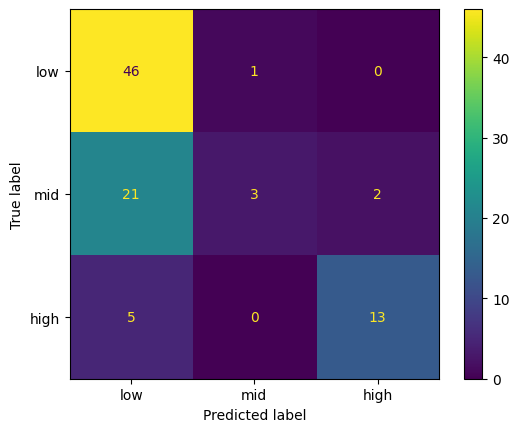

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =['low','mid','high'])
cm_display.plot()
plt.show()

# Оптимизация параметров модели, используя GridSearchCV


In [ ]:
parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['elasticnet', 'l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
grid_search = GridSearchCV(
    estimator = lg_model,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10,
    n_jobs=-1,
)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['elasticnet', 'l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
print("Best params:", grid_search.best_params_)
print("Best cross validaton score", grid_search.best_score_)

Best params: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross validaton score 0.7254504504504504


In [ ]:
lg_model_grid = LogisticRegression(C=100, penalty='l2', solver='liblinear')
lg_model_grid.fit(X_train, y_train)

LogisticRegression(C=100, solver='liblinear')

In [ ]:
y_pred_gr = lg_model_grid.predict(X_test)
y_pred_gr

array([2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
accuracy_gr = accuracy_score(y_test, y_pred_gr)
print(f'Logistic Regression grid_search : score = {accuracy_score(y_test, y_pred_gr)}')

Logistic Regression grid_search : score = 0.7032967032967034


In [ ]:
print(classification_report(y_test, y_pred_gr, target_names=['low','mid','high']))

              precision    recall  f1-score   support

         low       0.65      1.00      0.79        47
         mid       1.00      0.15      0.27        26
        high       0.87      0.72      0.79        18

    accuracy                           0.70        91
   macro avg       0.84      0.63      0.61        91
weighted avg       0.79      0.70      0.64        91



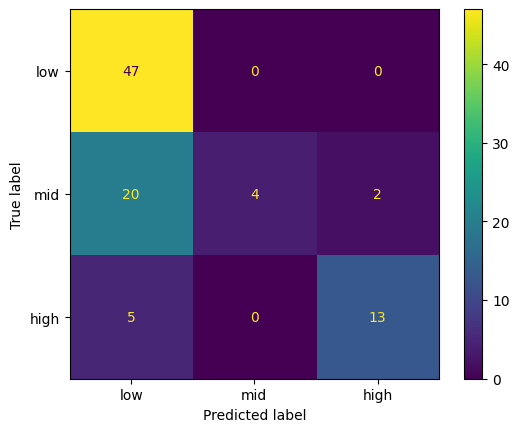

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_gr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =['low','mid','high'])
cm_display.plot()
plt.show()

## Обучение модели алгоритм дерево решений DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
model_RF = DecisionTreeClassifier()
model_RF.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_RF = model_RF.predict(X_test)
y_pred_RF

array([3., 1., 2., 2., 2., 1., 3., 3., 1., 1., 3., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 3., 3., 1., 3., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 3., 1., 2., 2., 1., 2., 1., 3., 2., 3., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2.,
       1., 2., 3., 3., 1., 2., 3., 1., 1., 1., 1., 3., 3., 2., 2., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [ ]:
accuracy_RF = accuracy_score(y_test, y_pred_RF)
accuracy_RF

0.6373626373626373

In [ ]:
print(classification_report(y_test, y_pred_RF, target_names=['low','mid','high']))

              precision    recall  f1-score   support

         low       0.70      0.85      0.77        47
         mid       0.53      0.31      0.39        26
        high       0.68      0.72      0.70        18

    accuracy                           0.67        91
   macro avg       0.64      0.63      0.62        91
weighted avg       0.65      0.67      0.65        91



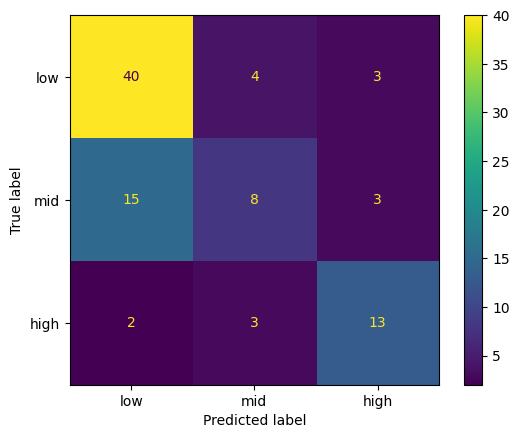

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,  y_pred_RF)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =['low','mid','high'])
cm_display.plot()
plt.show()

In [ ]:
y_pred_RF1 = model_RF.predict(X_train)
y_pred_RF1

array([1., 3., 2., 1., 2., 1., 1., 2., 2., 1., 3., 2., 1., 3., 3., 1., 1.,
       3., 1., 3., 1., 3., 2., 1., 2., 3., 3., 1., 1., 3., 2., 1., 1., 1.,
       1., 3., 2., 3., 2., 1., 1., 3., 1., 1., 3., 3., 3., 3., 3., 3., 3.,
       1., 1., 1., 1., 2., 3., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 3.,
       1., 1., 1., 1., 1., 3., 2., 1., 3., 1., 3., 2., 3., 1., 3., 1., 1.,
       1., 1., 1., 1., 3., 2., 1., 1., 2., 1., 3., 1., 3., 2., 1., 2., 2.,
       2., 1., 1., 1., 1., 3., 1., 1., 2., 3., 2., 3., 3., 1., 1., 1., 1.,
       2., 1., 3., 3., 1., 3., 2., 2., 2., 1., 3., 1., 2., 1., 1., 2., 1.,
       2., 1., 2., 1., 1., 3., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 3., 1., 2., 3., 3., 2., 1., 3., 1., 3., 3., 3., 1., 3., 3.,
       3., 1., 1., 1., 3., 2., 3., 2., 1., 1., 1., 1., 3., 2., 1., 1., 1.,
       1., 3., 1., 1., 1., 3., 1., 1., 3., 1., 2., 1., 1., 2., 1., 1., 1.,
       2., 3., 1., 1., 1.

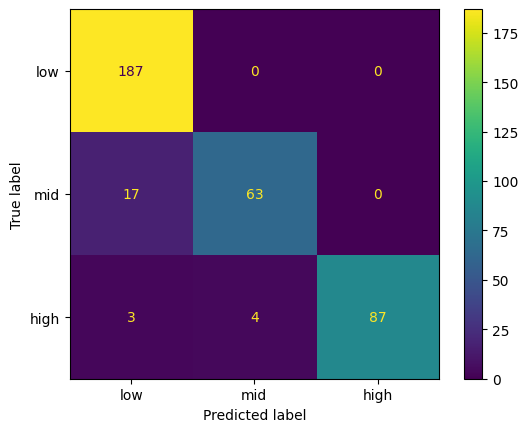

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_train,  y_pred_RF1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels =['low','mid','high'])
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_train, y_pred_RF1, target_names=['low','mid','high']))

              precision    recall  f1-score   support

         low       0.90      1.00      0.95       187
         mid       0.94      0.79      0.86        80
        high       1.00      0.93      0.96        94

    accuracy                           0.93       361
   macro avg       0.95      0.90      0.92       361
weighted avg       0.94      0.93      0.93       361



In [ ]:
model_RF.score(X_test,y_test)

0.6703296703296703

# Оптимизируем параметры с помощью grid_search

In [ ]:

params = {
           'max_depth': range(1,20),
          'max_leaf_nodes': range(1,25),
          'criterion':['gini', 'entropy', 'squared_eror']
        }

In [ ]:
grid_search = GridSearchCV(
    estimator = model_RF,
    param_grid = params,
    scoring = 'accuracy',
    cv = 10,
    n_jobs=-1,
)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'squared_eror'],
                         'max_depth': range(1, 20),
                         'max_leaf_nodes': range(1, 25)},
             scoring='accuracy')

In [ ]:
print("Best params:", grid_search.best_params_)
print("Best cross validaton score", grid_search.best_score_)

Best params: {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 10}
Best cross validaton score 0.7201201201201202


In [ ]:
model_F = DecisionTreeClassifier(criterion = "gini",  max_depth=5, random_state=42, max_leaf_nodes= 10)
model_F.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, random_state=42)

In [ ]:
y_pred_RfGs = model_F.predict(X_test)
y_pred_RfGs

array([2, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
accuracy_RfGs = accuracy_score(y_test, y_pred_RfGs)
accuracy_RfGs

0.6923076923076923

In [ ]:
print(classification_report(y_test, y_pred_RfGs))

              precision    recall  f1-score   support

           0       0.70      0.96      0.81        47
           1       0.50      0.23      0.32        26
           2       0.80      0.67      0.73        18

    accuracy                           0.69        91
   macro avg       0.67      0.62      0.62        91
weighted avg       0.66      0.69      0.65        91



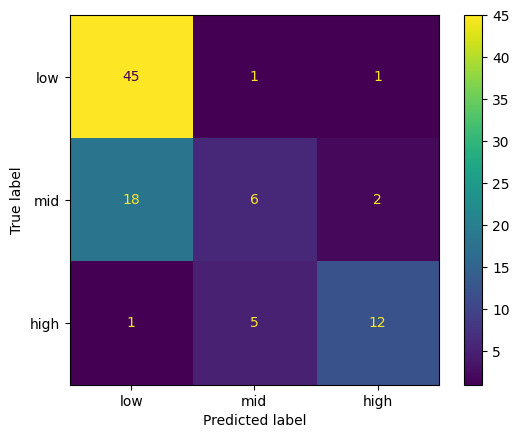

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,  y_pred_RfGs)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =['low','mid','high'])
cm_display.plot()
plt.show()

In [ ]:
feature_importances = model_F.feature_importances_
indices = np.argsort(feature_importances)
features = X_train.columns.values

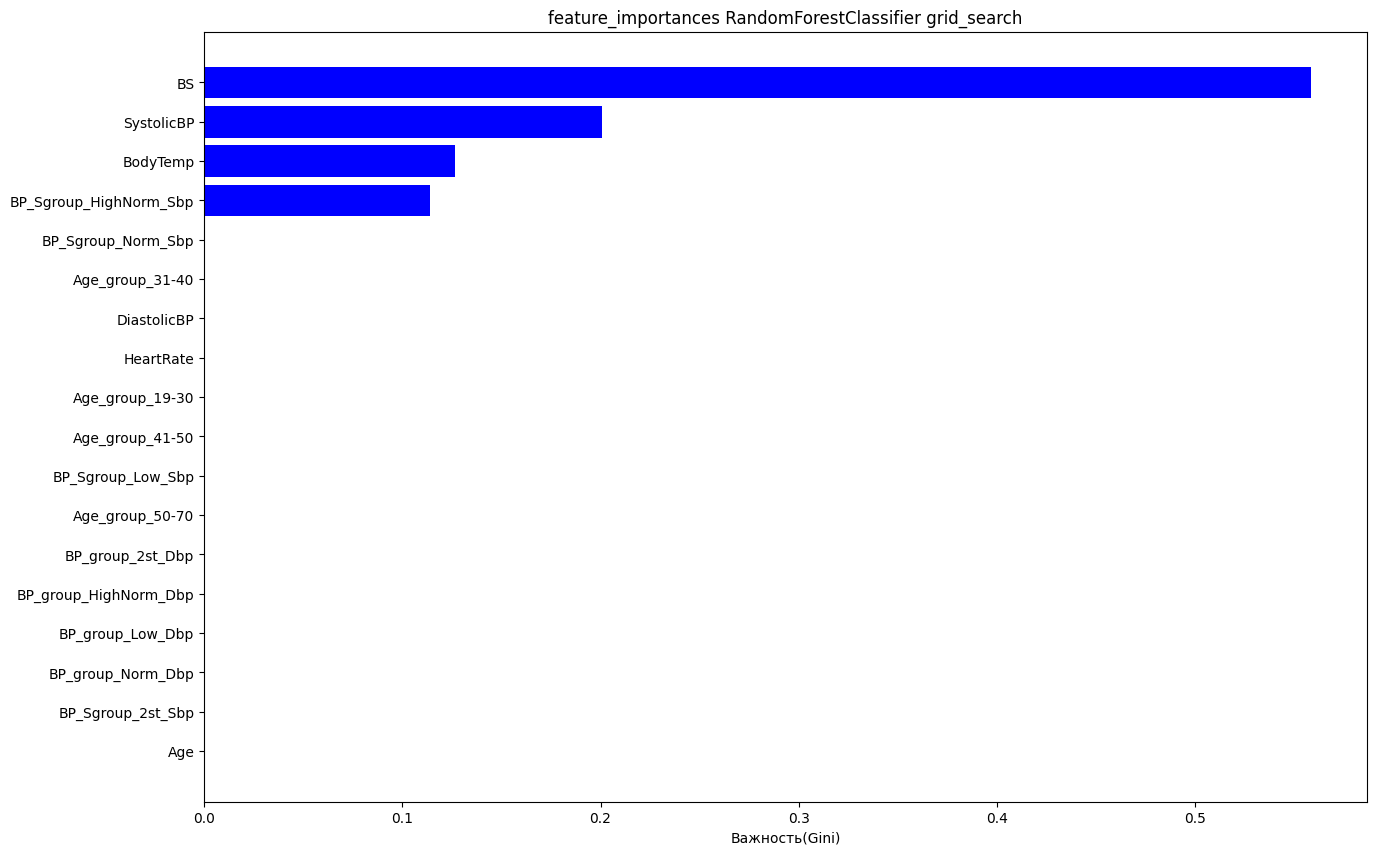

In [ ]:
plt.subplots(figsize=(15, 10))
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Важность(Gini)')
plt.title('feature_importances RandomForestClassifier grid_search')
plt.show()

## Обучение модели алгоритм Градиентный бустинг (xgboost)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)

In [ ]:
xgb_modelN = xgb.XGBClassifier(random_stare = 42, n_estimator = 100)
xgb_modelN.fit(X_train, y_train)
y_predxgbN = xgb_modelN.predict(X_test)

In [ ]:
encoder=LabelEncoder()
y_test=encoder.fit_transform(y_test)

In [ ]:
accuracy_xgb = accuracy_score(y_test, y_predxgbN)
accuracy_xgb

0.6263736263736264

In [ ]:
y_predxgbN = xgb_modelN.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predxgbN, target_names=['low','mid','high']))

              precision    recall  f1-score   support

         low       0.67      0.87      0.76        47
         mid       0.36      0.19      0.25        26
        high       0.69      0.61      0.65        18

    accuracy                           0.63        91
   macro avg       0.57      0.56      0.55        91
weighted avg       0.59      0.63      0.59        91



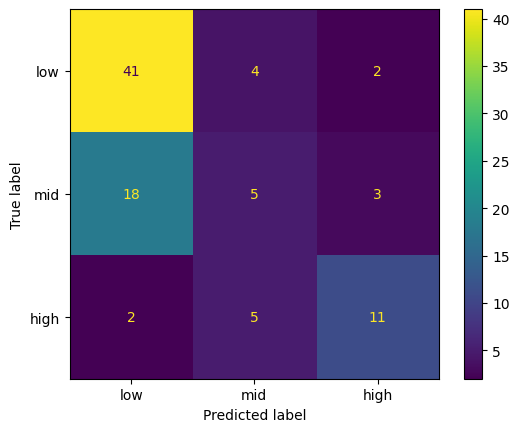

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,  y_predxgbN)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =['low','mid','high'])
cm_display.plot()
plt.show()

## Обучение модели алгоритм CatBoostClassifier

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model_CB = CatBoostClassifier(loss_function='MultiClass')
model_CB.fit(X_train,y_train, verbose=False)

print("Original classification threshold:")
print(model_CB.get_probability_threshold())
print("Predicted 1-st class probability:")
print(model_CB.predict(X_train, prediction_type='Probability')[:, 1])
print("Predictions with 0.5 threshold:")
print(model_CB.predict(X_train))
model_CB.set_probability_threshold(0.275)
print("Predictions after setting 0.275 threshold:")
print(model_CB.predict(X_train))

Original classification threshold:
0.5
Predicted 1-st class probability:
[0.0439395  0.00100148 0.55724224 0.09260927 0.96936954 0.14251943
 0.38012228 0.46259429 0.75406768 0.41386735 0.03474509 0.96083518
 0.02135643 0.01641318 0.04284142 0.0423731  0.33443668 0.00413806
 0.33749281 0.06484464 0.0303409  0.01630815 0.73036789 0.36718141
 0.76137037 0.00143505 0.00236501 0.02393846 0.26095915 0.01502246
 0.81113748 0.08029682 0.06176301 0.03102687 0.05068742 0.01418909
 0.72409878 0.00487427 0.85581134 0.05101672 0.01909672 0.01126685
 0.0289491  0.02286988 0.00952463 0.01442988 0.01112355 0.02070122
 0.01365375 0.00597914 0.00157983 0.0344398  0.07146456 0.01462259
 0.0883311  0.98219509 0.00926725 0.05471052 0.09018009 0.02446328
 0.04886626 0.01696229 0.06240026 0.00138511 0.02407932 0.03331203
 0.07806128 0.03865858 0.47398184 0.03785866 0.51799147 0.36986145
 0.07717226 0.00276176 0.72821679 0.1284244  0.01165787 0.00829953
 0.00873272 0.83751713 0.01290994 0.40939268 0.04088015 

In [ ]:
model_CB.get_feature_importance(prettified=True)

,Feature Id,Importances
0,BS,31.818640
1,HeartRate,12.804488
2,Age,12.013302
3,BodyTemp,9.901737
4,SystolicBP,7.579128
5,DiastolicBP,7.275485
6,BP_Sgroup_Norm_Sbp,5.828025
7,BP_group_Norm_Dbp,4.343024
8,Age_group_19-30,2.672737
9,Age_group_31-40,1.549331


In [ ]:
y_pred_new = model_CB.predict(X_test)

In [ ]:
accuracy_CB = accuracy_score(y_test, y_pred_new)
accuracy_CB

0.6813186813186813

In [ ]:
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.68      0.87      0.77        47
           1       0.60      0.35      0.44        26
           2       0.75      0.67      0.71        18

    accuracy                           0.68        91
   macro avg       0.68      0.63      0.64        91
weighted avg       0.67      0.68      0.66        91



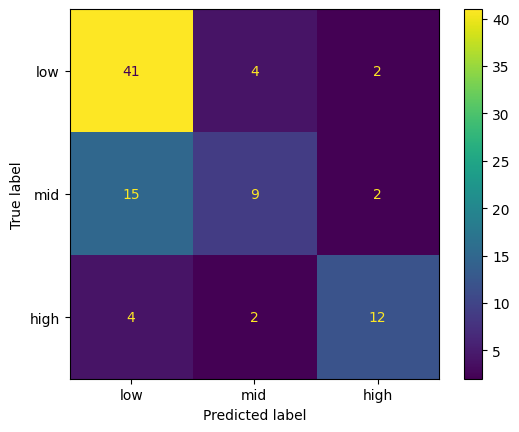

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_new)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =['low','mid','high'])
cm_display.plot()
plt.show()

## Итоговые результаты

In [ ]:
l = ['Logistic Regression', 'Logistic Regression_gs', 'DecisionTreeClassifier', 'DecisionTreeClassifier_gs', 'XGBoost Classifier', 'CatBoostClassifier']
l

['Logistic Regression',
 'Logistic Regression_gs',
 'DecisionTreeClassifier',
 'DecisionTreeClassifier_gs',
 'XGBoost Classifier',
 'CatBoostClassifier']

In [ ]:
accuracy_sum = [accuracy_lg, accuracy_gr, accuracy_RF, accuracy_RfGs, accuracy_xgb, accuracy_CB]
accuracy_sum

[0.6813186813186813,
 0.7032967032967034,
 0.6373626373626373,
 0.6923076923076923,
 0.6263736263736264,
 0.6813186813186813]

In [ ]:
df1 = pd.DataFrame({"ML Algorithm": l, "Accuracy ":accuracy_sum })
df1

,ML Algorithm,Accuracy
0,Logistic Regression,0.681319
1,Logistic Regression_gs,0.703297
2,DecisionTreeClassifier,0.637363
3,DecisionTreeClassifier_gs,0.692308
4,XGBoost Classifier,0.626374
5,CatBoostClassifier,0.681319


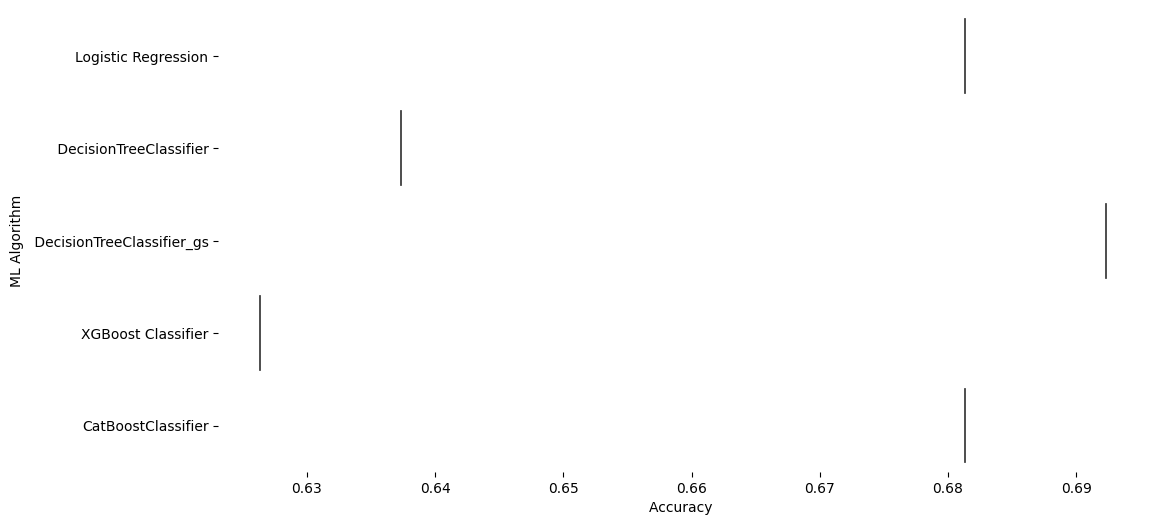

In [ ]:
# @title ML Algorithm vs Accuracy

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df1['ML Algorithm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df1, x='Accuracy ', y='ML Algorithm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Основная цель работы определить степень риска беременных женщин
В результате работы был проведен анализ данных, визуализация данных.
В моделировании были использованы 4 модели классификации:  Logistic
Regression, DecisionTreeClassifier, XGboost, CatboostClassifier.
По результататм работы наилучшие метрики показала модель Logistic
Regression с подбором параметров.
Немаловажных факторов является подбор гиперпараметров моделей, так как они
также влияют на точность предсказаний. Были сгенерированы новые признаки группы по возрастам и давлению.
Беременность низкого риска более распростаненная, более чем  в половине случаев. Большинство беременных в возрасте до 30 лет. Наибольшее влияние оказывает показатель уровня сахара.
С уровнем сахара более 8 ммоль/л беременность входит в высокую группу риска.

Описание метрик:
Для описания метрик используем ошибок классификации используем confusion
matrix (матрица ошибок).

*   Accuracy
accuracy — доля правильных ответов алгоритма. Модель
предсказывает риски с вероятностью  62-71%.


*   Precision, recall и F-мера
Для оценки качества работы алгоритма на каждом из классов по отдельности
импользуют метрики precision (точность) и recall (полнота). Метрики подходят когда
больше интересует один из классов.
Результаты показывают, что несмотря на то что accuracy модели находится в
диапазоне от 62-71%, показатель recall находится в диапазоне только от 15-100% и F1_score в диапазоне от 30-80 % в зависимости от класса.

Самые низкие показатели для класса mid.
Не очень высокие показатели связаны с небольшим количеством данных (после удаления дублей порядка 50 % ), не сбалансированный набор данных.
Если не удалять дубли показатели будут выше, за счет того, что модель обучается и тестируется на одних и тех же двнных


Дополнительно для модели DecisionTreeClassifier выведена матрица ошибок на трейне.
